In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 
from tensorflow.keras.models import save_model, load_model
import PIL.ImageOps 




In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imgone = image.load_img('/content/drive/MyDrive/Цифра1.png', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку

In [ ]:
imgs = image.load_img('/content/drive/MyDrive/Цифра.png', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку

In [ ]:
imgf = image.load_img('/content/drive/MyDrive/FotoFour.jpg', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку

In [ ]:
imgone

In [ ]:
imgs

In [ ]:
imgf

In [ ]:
imgone = image.img_to_array(imgone)     # Преобразую в массив
imgs = image.img_to_array(imgs) 
imgf = image.img_to_array(imgf)     # Преобразую в массив

In [ ]:
imgone[0]       # Проверка содержимого. 

array([[255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.]], dtype=float32)

In [ ]:
imgone.shape # Размерность

(28, 28, 1)

In [ ]:
imgs.shape

(28, 28, 1)

In [ ]:
imgone=255-imgone      # Инверсия цвета
imgs=255-imgs
imgf=255-imgf     # Инверсия цветов картинки

In [ ]:
imgone

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
      

In [ ]:
imgone = imgone.astype('float32')   # Преобразую во Float32
imgs = imgs.astype('float32')
imgf = imgf.astype('float32')   # Преобразую во Float32

In [ ]:
imgone=imgone/255       # Нормализация данных
imgs = imgs/255
imgf=imgf/255       # Нормализация данных

In [ ]:
imgone = imgone.reshape(1, 784)     #  Решейп
imgs = imgs.reshape(1,784)
imgf = imgf.reshape(1, 784)     #  Решейп

In [ ]:
print(imgone.shape)      # Проверка рзмера. Размер правильный
print(imgs.shape)
print(imgf.shape)

(1, 784)
(1, 784)
(1, 784)


In [ ]:
imgone[0]          # Контроль содержимого

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()   # Загрузил данные для нейронки

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train_org.shape)
print(x_test_org.shape)

(60000, 28, 28)
(10000, 28, 28)


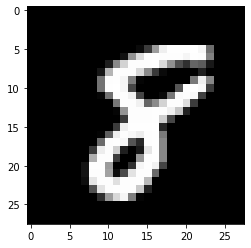

In [ ]:
n = 777  # номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))   # отрисовка картинки
plt.show()  # вывод картинки

In [ ]:
y_train_org[n]

8

In [ ]:
x_train = x_train_org.reshape(60000, 784)     # Меняем размер формата входных 
x_test = x_test_org.reshape(10000, 784)       # данных
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train = x_train.astype('float32')   #Блок нормализации данных входных картинок
x_train = x_train / 255               # На 255 делим, чтобы диапазон был от 0 до
x_test = x_test.astype('float32')     #  1. Т.к. диапазон цвета от 0 до 255
x_test = x_test / 255

In [ ]:
y_train_org[88]

0

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)   # One hot encoding
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
print(y_train[9])  #Пример выходного вектора 
print(y_test[9])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
print(y_train_org.shape)
print(y_test_org.shape)

(60000,)
(10000,)


In [ ]:
print(y_train_org[90])
print(y_test_org[90])

6
3


In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(800, input_dim = 784, activation='relu'))  #  Полносвязный слой на 800 нейронов
#model.add(Dense(400, activation='relu'))   #Полносвязный слой на 400 нейронов
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 800)               628000    
                                                                 
 dense_8 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, y_train, batch_size = 196, epochs=10,verbose=1)   # Обучаем нейронку

Epoch 1/10
307/307 [==============================] - 5s 15ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 2/10
307/307 [==============================] - 5s 15ms/step - loss: 3.5626e-04 - accuracy: 1.0000
Epoch 3/10
307/307 [==============================] - 5s 15ms/step - loss: 2.4672e-04 - accuracy: 1.0000
Epoch 4/10
307/307 [==============================] - 5s 15ms/step - loss: 1.8745e-04 - accuracy: 1.0000
Epoch 5/10
307/307 [==============================] - 5s 15ms/step - loss: 1.5822e-04 - accuracy: 1.0000
Epoch 6/10
307/307 [==============================] - 5s 15ms/step - loss: 1.3915e-04 - accuracy: 1.0000
Epoch 7/10
307/307 [==============================] - 5s 15ms/step - loss: 1.2284e-04 - accuracy: 1.0000
Epoch 8/10
307/307 [==============================] - 5s 15ms/step - loss: 1.0955e-04 - accuracy: 1.0000
Epoch 9/10
307/307 [==============================] - 5s 15ms/step - loss: 9.6405e-05 - accuracy: 1.0000
Epoch 10/10
307/307 [==============================] - 5s 1

In [ ]:
model.save_weights('model.Firsty_layer_Pro')    # Сохраняем модель


In [ ]:
model.load_weights('model.Firsty_layer_Pro')

In [ ]:
x_test[18].shape

(784,)

<function matplotlib.pyplot.show>

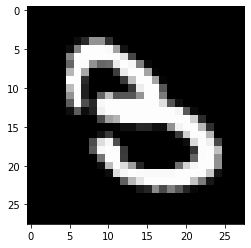

In [ ]:
n_rec = 18
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show

In [ ]:
imgone
print(imgone.shape)

(1, 784)


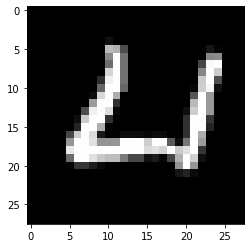

In [ ]:
n_rec = 33 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [ ]:
x = x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(imgone)

In [ ]:
print(prediction)

[[0.01204089 0.29367483 0.01428727 0.0240959  0.17635964 0.13864085
  0.01676723 0.02387573 0.22166245 0.07859513]]


In [ ]:
sum(prediction[0])

0.9999999143183231

In [ ]:
pred = np.argmax(prediction)
print(pred)

1


In [ ]:
print(y_test_org[n_rec])

4


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
#Выводим для примера картинки по каждому классу

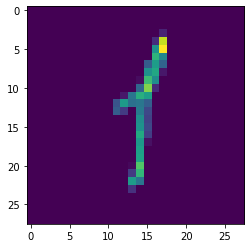

In [ ]:
img = load_img('/content/drive/MyDrive/Цифра1.png', target_size=(28, 28), color_mode = 'grayscale') 
plt.imshow(1 - np.array(img) / 255)
plt.show() #Показываем изображения

In [ ]:
print('Число: 1. Cеть распознала:', np.argmax(model.predict(np.array(1 - np.array(img) / 255).reshape(1, 784))))

Число: 1. Cеть распознала: 8
